# I ended up not using this data set in the end, as the correlations were very weak

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
sns.set_style("dark")

In [3]:
df = pd.read_csv('steam.csv', sep=',')

In [4]:
df.pop('appid')
# Convert english too boolean
df['english'] = df['english'].astype('bool')
# set release date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
# create 3 seperate platform fields instead of 1
df['windows'], df['mac'], df['linux'] = df['platforms'].apply(lambda x: 'windows' in x),df['platforms'].apply(lambda x: 'mac' in x),df['platforms'].apply(lambda x: 'linux' in x)
df.drop(columns='platforms', inplace=True)
df['owners_low'] = df['owners'].apply(lambda x: x.split('-')[0]).astype('int')
df['owners_high'] = df['owners'].apply(lambda x: x.split('-')[1]).astype('int')
df['release_year'] = df['release_date'].dt.year
df.drop(columns='owners', inplace=True)
genres = df['genres'].apply(lambda x: x.split(';')[0])

In [5]:
medianPlaytimeFilter = df['median_playtime']> 0.5
ownersFilter = df['owners_low'] > 20000 #lowest range above 0
reviewFilter = df['positive_ratings'] > 5
noFreeGameFilter = df['price'] > 0.1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              27075 non-null  object        
 1   release_date      27075 non-null  datetime64[ns]
 2   english           27075 non-null  bool          
 3   developer         27075 non-null  object        
 4   publisher         27075 non-null  object        
 5   required_age      27075 non-null  int64         
 6   categories        27075 non-null  object        
 7   genres            27075 non-null  object        
 8   steamspy_tags     27075 non-null  object        
 9   achievements      27075 non-null  int64         
 10  positive_ratings  27075 non-null  int64         
 11  negative_ratings  27075 non-null  int64         
 12  average_playtime  27075 non-null  int64         
 13  median_playtime   27075 non-null  int64         
 14  price             2707

Average playtime vs publisher
I expect there to be a difference publisher and playtime. I expect there to be a heavy correlation between publisher and playtime.

In [7]:
sortedDataset = df[df['average_playtime'] > 200][df['average_playtime'] < 5000].sort_values(by='average_playtime',ascending=False).head(10000)
sortedDataset

C:\Users\Stijn\AppData\Local\Temp/ipykernel_6588/483420109.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sortedDataset = df[df['average_playtime'] > 200][df['average_playtime'] < 5000].sort_values(by='average_playtime',ascending=False).head(10000)


,name,release_date,english,developer,publisher,required_age,categories,genres,steamspy_tags,achievements,...,negative_ratings,average_playtime,median_playtime,price,windows,mac,linux,owners_low,owners_high,release_year
493,Europa Universalis: Rome - Gold Edition,2008-12-18,True,Paradox Development Studio,Paradox Interactive,0,Single-player;Multi-player;Co-op,Strategy,Strategy;Grand Strategy;Historical,0,...,52,4975,4975,7.99,True,False,False,50000,100000,2008
1596,Euro Truck Simulator 2,2012-10-12,True,SCS Software,SCS Software,0,Single-player;Steam Achievements;Steam Trading...,Indie;Simulation,Simulation;Driving;Open World,67,...,5825,4942,1413,14.99,True,True,True,5000000,10000000,2012
3504,Call of Duty®: Black Ops III,2015-11-05,True,Treyarch;Aspyr (Mac),Activision;Aspyr (Mac),18,Single-player;Multi-player;Co-op;Steam Achieve...,Action;Adventure,Multiplayer;FPS;Zombies,98,...,23157,4925,2513,44.99,True,True,False,1000000,2000000,2015
5312,Tree of Life,2017-08-17,True,oddonegames,oddonegames,0,Multi-player;Online Multi-Player;MMO;Co-op;Onl...,Indie;Massively Multiplayer;RPG,Survival;Sandbox;Open World,0,...,2203,4866,4866,14.99,True,False,False,100000,200000,2017
8004,Friday the 13th: The Game,2017-05-25,True,IllFonic,Gun Media,18,Multi-player;Steam Achievements;Full controlle...,Action,Horror;Multiplayer;Survival Horror,53,...,8304,4823,4944,15.49,True,False,False,500000,1000000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8453,Catch a Falling Star,2016-03-30,True,Alister Software,Back To Basics Gaming,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie,Casual;Indie;Relaxing,45,...,137,201,215,0.79,True,False,False,200000,500000,2016
998,The Bureau: XCOM Declassified,2013-08-22,True,2K Marin,2K,16,Single-player;Steam Achievements;Full controll...,Action,Action;Tactical;Sci-fi,41,...,2923,201,168,14.99,True,True,False,2000000,5000000,2013
6293,The Tape,2015-11-19,True,Kazakov Oleg,Kazakov Oleg,18,Single-player;Steam Achievements;Steam Trading...,Indie,Indie;Horror;First-Person,4,...,139,201,230,0.79,True,False,False,100000,200000,2015
1792,Wanderlust Adventures,2015-08-10,True,Yeti Trunk,Chucklefish,0,Single-player;Multi-player;Online Multi-Player...,Action;Adventure;Indie;RPG,Adventure;Indie;RPG,37,...,86,201,201,6.99,True,False,False,20000,50000,2015


In [8]:
sortedDataset['developer']

493      Paradox Development Studio
1596                   SCS Software
3504           Treyarch;Aspyr (Mac)
5312                    oddonegames
8004                       IllFonic
                    ...            
8453               Alister Software
998                        2K Marin
6293                   Kazakov Oleg
1792                     Yeti Trunk
10253        Blastoid Entertainment
Name: developer, Length: 3341, dtype: object

[Text(0, 0, 'Paradox Development Studio'),
 Text(1, 0, 'SCS Software'),
 Text(2, 0, 'Treyarch;Aspyr (Mac)'),
 Text(3, 0, 'oddonegames'),
 Text(4, 0, 'IllFonic'),
 Text(5, 0, 'Bethesda Game Studios'),
 Text(6, 0, 'Nadeo'),
 Text(7, 0, 'Firaxis Games;Aspyr (Mac);Aspyr (Linux)'),
 Text(8, 0, 'The Sims Studio'),
 Text(9, 0, 'CREATIVE ASSEMBLY;Feral Interactive (Mac);Feral Interactive (Linux)'),
 Text(10, 0, 'Digitalmindsoft'),
 Text(11, 0, 'Visual Concepts'),
 Text(12, 0, 'Star Gem Inc.'),
 Text(13, 0, 'Nicalis, Inc.'),
 Text(14, 0, 'Frontier Developments'),
 Text(15, 0, 'Pyrodactyl'),
 Text(16, 0, 'Funcom'),
 Text(17, 0, 'Jon Gallant'),
 Text(18, 0, 'Giants Software'),
 Text(19, 0, 'BANDAI NAMCO Studios Inc.'),
 Text(20, 0, 'Playsport Games'),
 Text(21, 0, 'Bartosz Bojarowski'),
 Text(22, 0, 'Aaron Oldenburg'),
 Text(23, 0, 'Massive Entertainment'),
 Text(24, 0, 'FromSoftware, Inc.'),
 Text(25, 0, 'Gaijin Entertainment'),
 Text(26, 0, 'Frontwing'),
 Text(27, 0, 'GSQ Games'),
 Text(28, 0, 

C:\Users\Stijn\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  func(*args, **kwargs)
C:\Users\Stijn\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from current font.
  func(*args, **kwargs)
C:\Users\Stijn\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 28891 (\N{CJK UNIFIED IDEOGRAPH-70DB}) missing from current font.
  func(*args, **kwargs)
C:\Users\Stijn\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 40857 (\N{CJK UNIFIED IDEOGRAPH-9F99}) missing from current font.
  func(*args, **kwargs)
C:\Users\Stijn\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from current font.
  func(*args, **kwargs)
C:\Users\Stijn\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24687 (\N{

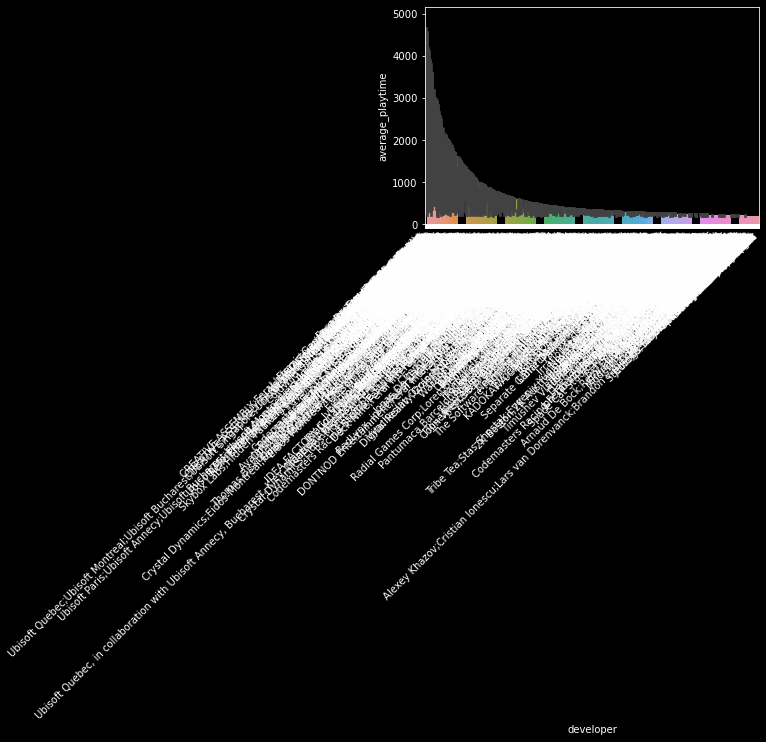

In [9]:
plot = sns.barplot(x="developer", y="average_playtime", data=sortedDataset)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')